In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [273]:
data = pd.read_csv("project_data.csv")

### Data Summary

In [5]:
data.info()
#Varibles with null values
#b2, c8, marriage-status, school

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   b1               41188 non-null  object 
 2   b2               40198 non-null  object 
 3   c10              41188 non-null  object 
 4   c3               41188 non-null  object 
 5   c4               41188 non-null  object 
 6   c8               5625 non-null   object 
 7   dow              41188 non-null  object 
 8   employment       41188 non-null  object 
 9   i1               41188 non-null  float64
 10  i2               41188 non-null  float64
 11  i3               41188 non-null  float64
 12  i4               41188 non-null  float64
 13  i5               41188 non-null  float64
 14  marriage-status  41108 non-null  object 
 15  month            41188 non-null  object 
 16  n2               41188 non-null  int64  
 17  n3          

In [132]:
#Check for duplicate rows
duplicates = data.duplicated()
len(data[duplicates])

0

### Target Outcome - Successful Sale

In [30]:
data['successful_sell'].value_counts()

successful_sell
no     36548
yes     4640
Name: count, dtype: int64

In [109]:
#Outcome is imbalanced, but not rare. Approximately 8 to 1. Conversion Rate 11.26%
4640/(4640+36548)

0.11265417111780131

### Define Functions

In [89]:
#summarizes for categorical variable
def conversion_table(data,var):
    x = pd.crosstab(data[var],data['successful_sell'], dropna = False)
    x['total'] = x['yes']+x['no']
    x['conversion_rate'] = 100*x['yes']/(x['yes']+x['no'])

    return x

In [281]:
def barlineplot(plot_data, rate_lim = 100):
    plot_data[['yes','no']].plot(kind = 'bar', stacked = True, color = ['tab:orange','tab:blue'])

    plt.ylabel("Count")
    
    axes2 = plt.twinx()
    axes2.plot(plot_data.index, plot_data['conversion_rate'], color='k', marker = 'o')
    axes2.set_ylim(0, rate_lim)
    axes2.set_ylabel('Sales %')
    
    plt.show()

In [295]:
def lp(x, variable):
    plt.plot(x.index, x['conversion_rate'], color='k', marker = 'o')
    plt.xlabel(variable)
    plt.ylabel('Sales %')

## Features

### Age

In [10]:
data['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

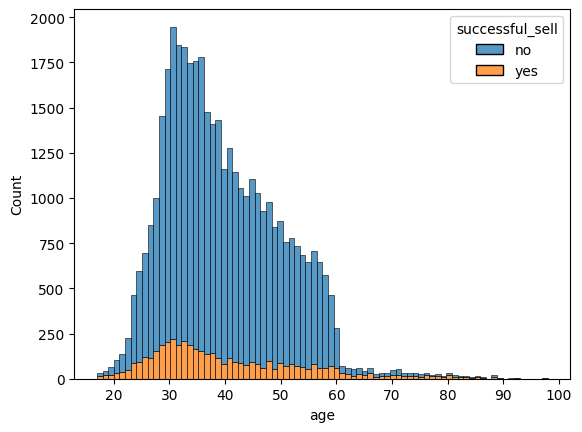

In [243]:
sns.histplot(data=data, x="age", hue="successful_sell", multiple = "stack",bins = 80)

In [325]:
x = conversion_table(data,'age')

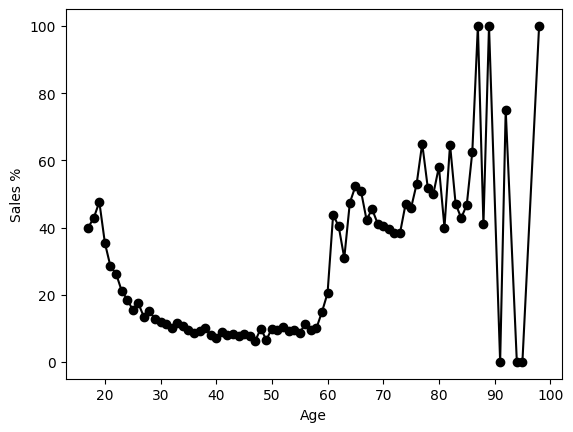

In [326]:
lp(x,'Age')

### b1

In [84]:
conversion_table(data,'b1')

successful_sell,no,yes,total,conversion_rate
b1,,,,
-1,883,107,990,10.808081
no,16596,2026,18622,10.879605
yes,19069,2507,21576,11.619392


### b2

In [91]:
conversion_table(data,'b2')

successful_sell,no,yes,total,conversion_rate
b2,,,,
no,30100,3850,33950,11.340206
yes,5565,683,6248,10.931498
NaN,883,107,990,10.808081


### b1 - b2

In [114]:
pd.crosstab(data['b1'],data['b2'], dropna = False)

b2,no,yes,NaN
b1,,,
-1,0,0,990
no,16065,2557,0
yes,17885,3691,0


In [318]:
#Check Relationship to each other
res = chi2_contingency(pd.crosstab(data['b1'],data['b2']))
print("Chi2 = ",res.statistic)
print("p-Value = ", res.pvalue)

Chi2 =  86.51910294284156
p-Value =  1.3839401847144125e-20


In [126]:
#Cramer's V
association(pd.crosstab(data['b1'],data['b2']))

0.04646198849528686

### c10

In [ ]:
# This is a copy of the outcome variable

In [83]:
conversion_table(data,'c10')

successful_sell,no,yes,total,conversion_rate
c10,,,,
no,36548,0,36548,0.0
yes,0,4640,4640,100.0


### c3

In [86]:
conversion_table(data,'c3')

successful_sell,no,yes,total,conversion_rate
c3,,,,
False,28391,4197,32588,12.878974
True,3,0,3,0.000000
unknown,8154,443,8597,5.152960


### c4

In [92]:
conversion_table(data,'c4')

successful_sell,no,yes,total,conversion_rate
c4,,,,
new,22291,3853,26144,14.737607
old,14257,787,15044,5.231321


### c8

In [93]:
conversion_table(data,'c8')

successful_sell,no,yes,total,conversion_rate
c8,,,,
no,3647,605,4252,14.228598
yes,479,894,1373,65.112891
NaN,32422,3141,35563,8.832213


### Day of Week

In [94]:
conversion_table(data,'dow')

successful_sell,no,yes,total,conversion_rate
dow,,,,
fri,6981,846,7827,10.808739
mon,7667,847,8514,9.948320
thu,7578,1045,8623,12.118752
tue,7137,953,8090,11.779975
wed,7185,949,8134,11.667076


In [282]:
#reorder data for plot
plot_data = conversion_table(data,'dow')
new_order = ['mon', 'tue', 'wed','thu','fri']
plot_data = plot_data.reindex(new_order)

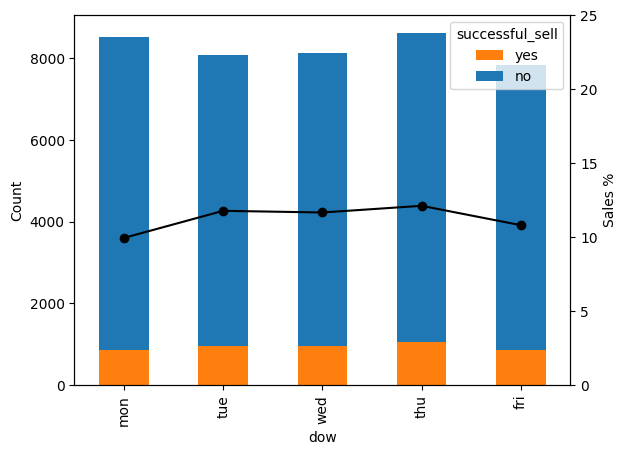

In [283]:
barlineplot(plot_data, 25)

### Employment

In [95]:
conversion_table(data,'employment')

successful_sell,no,yes,total,conversion_rate
employment,,,,
assistant,9070,1352,10422,12.972558
cleaner,954,106,1060,10.000000
customer service,3646,323,3969,8.138070
engineer,6013,730,6743,10.826042
hobbyist,1332,124,1456,8.516484
laborer,8616,638,9254,6.894316
leisure,1286,434,1720,25.232558
management,2596,328,2924,11.217510
none,870,144,1014,14.201183


In [284]:
#reorder data for plot
plot_data = conversion_table(data,'employment')
plot_data = plot_data.sort_values(by = 'total', ascending = False)

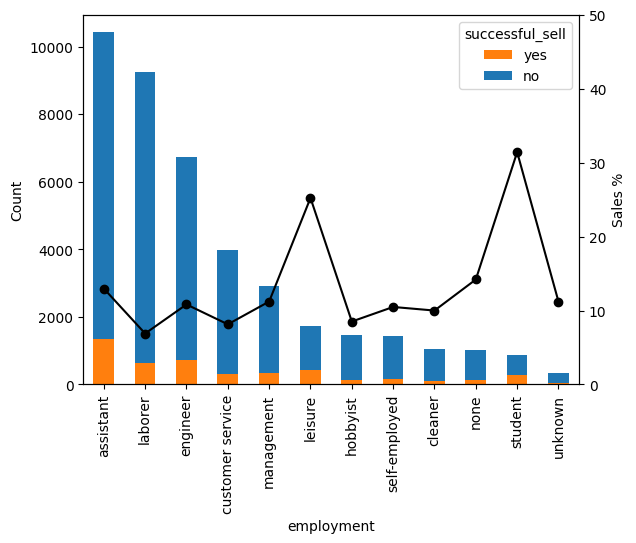

In [285]:
barlineplot(plot_data,50)

### i1

<Axes: xlabel='i1', ylabel='Count'>

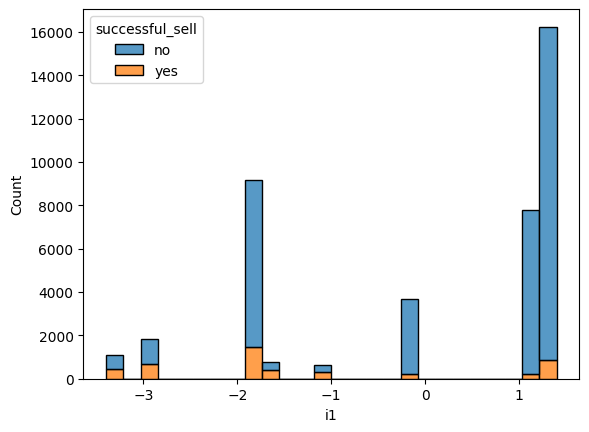

In [103]:
sns.histplot(data, x="i1", hue="successful_sell", multiple = 'stack')

### i2

<Axes: xlabel='i2', ylabel='Count'>

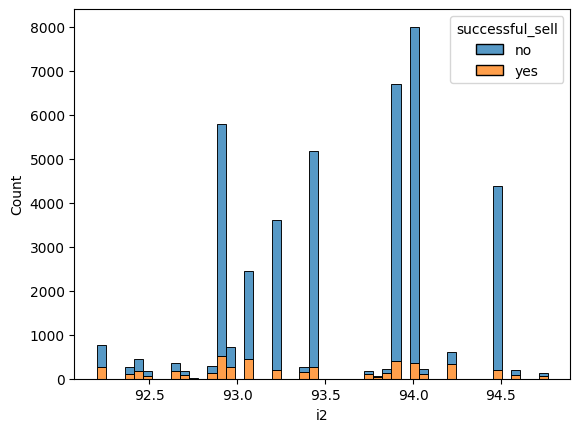

In [105]:
sns.histplot(data, x="i2", hue="successful_sell", multiple = 'stack')

### i3 

<Axes: xlabel='i3', ylabel='Count'>

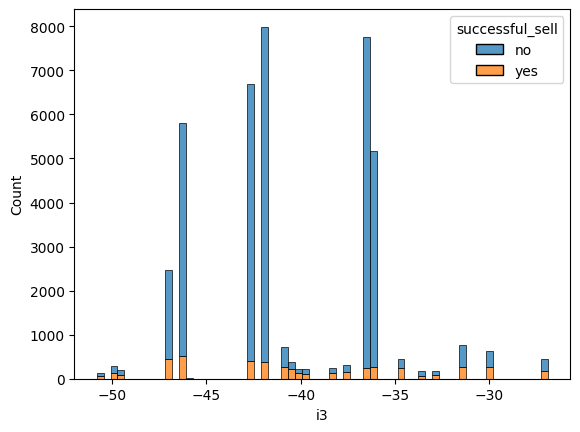

In [106]:
sns.histplot(data, x="i3", hue="successful_sell", multiple = 'stack')

### i4

<Axes: xlabel='i4', ylabel='Count'>

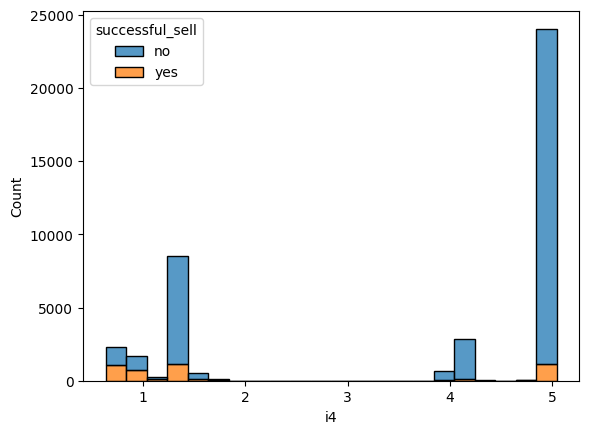

In [107]:
sns.histplot(data, x="i4", hue="successful_sell", multiple = 'stack')

### i5

<Axes: xlabel='i5', ylabel='Count'>

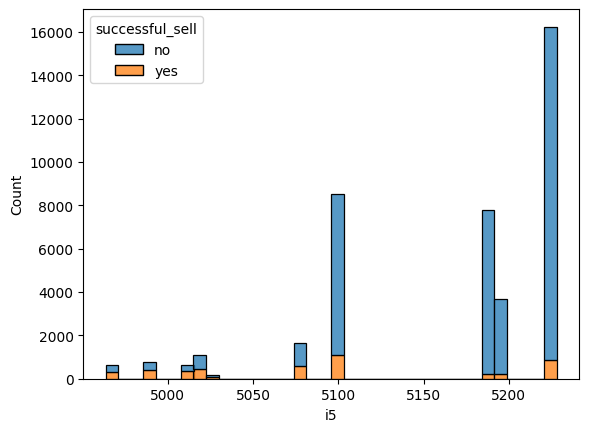

In [108]:
sns.histplot(data, x="i5", hue="successful_sell", multiple = 'stack')

### Marriage Status

In [96]:
conversion_table(data,'marriage-status')

successful_sell,no,yes,total,conversion_rate
marriage-status,,,,
divorced,4136,476,4612,10.320902
married,22396,2532,24928,10.157253
single,9948,1620,11568,14.004149
NaN,68,12,80,15.000000


In [286]:
#Order data for plot
plot_data = conversion_table(data,'marriage-status')
plot_data = plot_data.sort_values(by = 'total', ascending = False)
plot_data.index = pd.Series(plot_data.index).replace(np.nan, 'uknown')

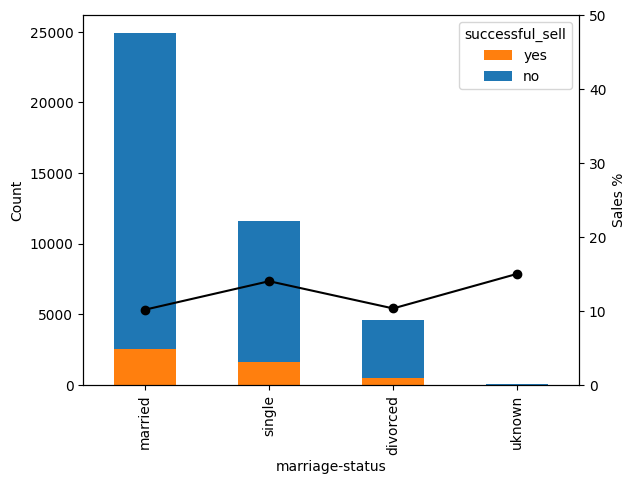

In [287]:
barlineplot(plot_data, 50)

### Month

In [ ]:
#No data from Jan or Feb

In [308]:
conversion_table(data,'month')

successful_sell,no,yes,total,conversion_rate
month,,,,
apr,2093,539,2632,20.478723
aug,5523,655,6178,10.602137
dec,93,89,182,48.901099
jul,6525,649,7174,9.046557
jun,4759,559,5318,10.511470
mar,270,276,546,50.549451
may,12883,886,13769,6.434745
nov,3685,416,4101,10.143867
oct,403,315,718,43.871866


In [331]:
#reorder data for plot

plot_data = conversion_table(data,'month')
#Add missing months for visual
plot_data.loc['jan'] = [0, 0, 0, 0]
plot_data.loc['feb'] = [0, 0, 0, 0]

new_order = ['jan','feb','mar', 'apr', 'may','jun','jul','aug','sep','oct','nov','dec']
plot_data = plot_data.reindex(new_order)

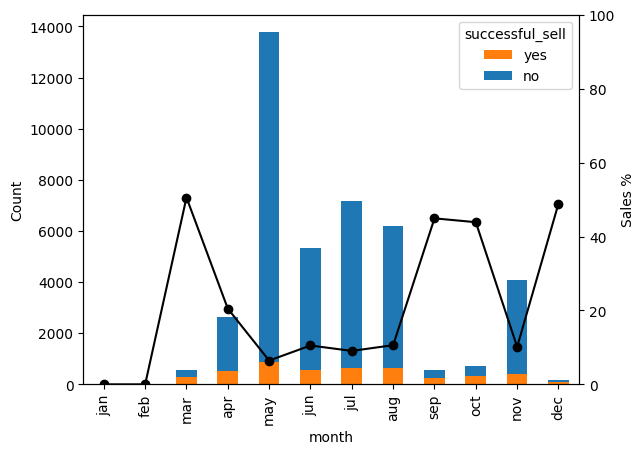

In [332]:
barlineplot(plot_data, 100)

### n2

In [297]:
x = conversion_table(data,'n2')
x

successful_sell,no,yes,total,conversion_rate
n2,,,,
1,15342,2300,17642,13.037071
2,9359,1211,10570,11.456954
3,4767,574,5341,10.747051
4,2402,249,2651,9.392682
5,1479,120,1599,7.504690
6,904,75,979,7.660878
7,591,38,629,6.041335
8,383,17,400,4.250000
9,266,17,283,6.007067


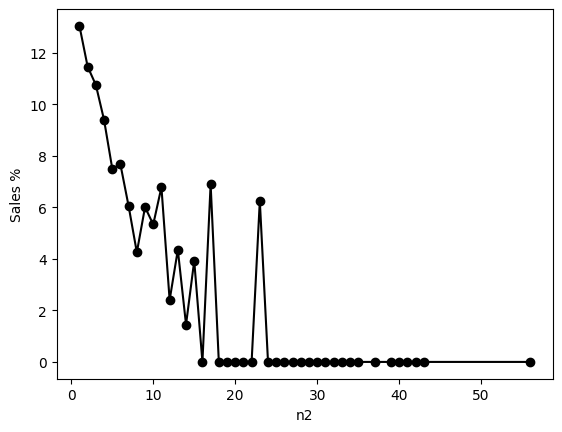

In [298]:
lp(x,'n2')

### n3

In [299]:
x = conversion_table(data,'n3')
x

successful_sell,no,yes,total,conversion_rate
n3,,,,
500,752,103,855,12.046784
510,683,102,785,12.993631
520,721,91,812,11.206897
530,750,81,831,9.747292
540,712,76,788,9.644670
550,737,102,839,12.157330
560,682,109,791,13.780025
570,726,72,798,9.022556
580,735,96,831,11.552347


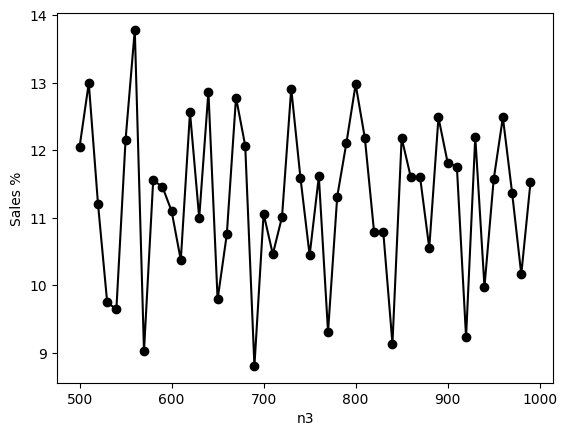

In [301]:
lp(x,'n3')

### n4

In [303]:
x = conversion_table(data,'n4')
x

successful_sell,no,yes,total,conversion_rate
n4,,,,
0,5,10,15,66.666667
1,18,8,26,30.769231
2,24,37,61,60.655738
3,141,298,439,67.881549
4,55,63,118,53.389831
5,17,29,46,63.043478
6,123,289,412,70.145631
7,20,40,60,66.666667
8,6,12,18,66.666667


### n5

<Axes: xlabel='n5', ylabel='Count'>

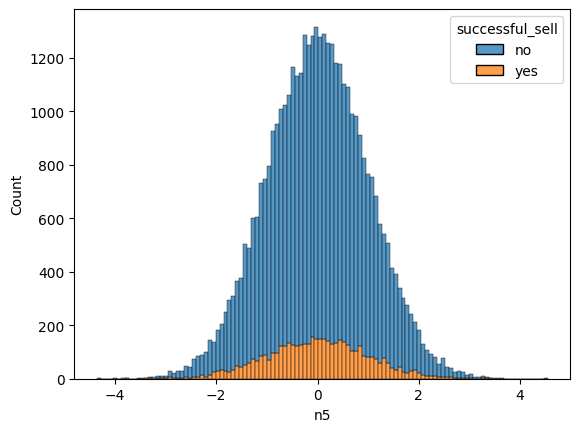

In [246]:
sns.histplot(data, x="n5", hue="successful_sell", multiple = 'stack')

### n6 

In [305]:
x = conversion_table(data,'n6')
x

successful_sell,no,yes,total,conversion_rate
n6,,,,
0,32422,3141,35563,8.832213
1,3594,967,4561,21.201491
2,404,350,754,46.419098
3,88,128,216,59.259259
4,32,38,70,54.285714
5,5,13,18,72.222222
6,2,3,5,60.000000
7,1,0,1,0.000000


In [306]:
plot_data = conversion_table(data,'n6')

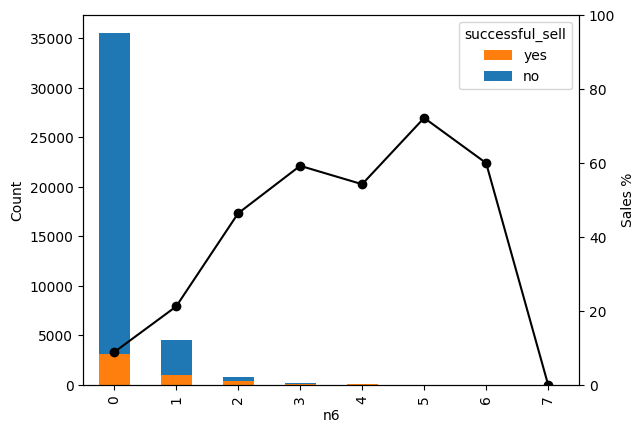

In [307]:
barlineplot(plot_data)

### Amount of school

In [102]:
conversion_table(data,'school')

successful_sell,no,yes,total,conversion_rate
school,,,,
0 - none,14,4,18,22.222222
1 - almost none,3748,428,4176,10.249042
2 - a little bit,2104,188,2292,8.202443
3 - a bit more,5572,473,6045,7.824648
4 - average amount,8484,1031,9515,10.835523
5 - a decent amount,4648,595,5243,11.348465
5 - a lot,10498,1670,12168,13.724523
NaN,1480,251,1731,14.500289


In [328]:
plot_data = conversion_table(data,'school')
plot_data.index = pd.Series(plot_data.index).replace(np.nan, 'Uknown')

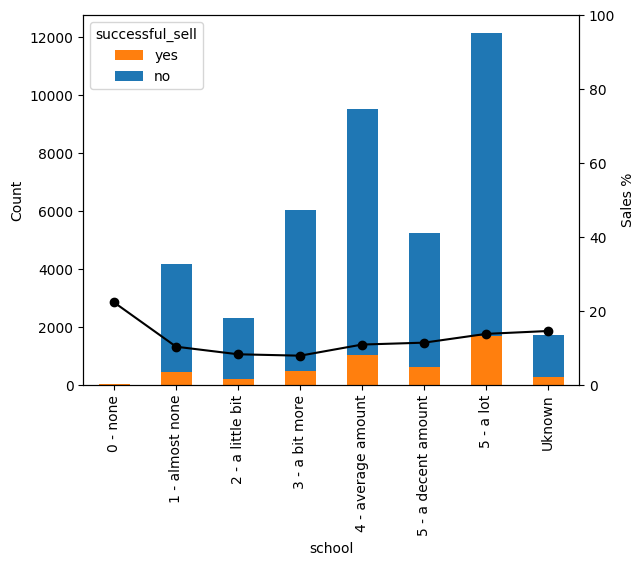

In [329]:
barlineplot(plot_data,100)